In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
# read filtered dataset
data=pd.read_csv('final_dataset.csv')
data

,Unnamed: 0,ad_position_type,click,cms_group_id,gender,age_level,shopping_level,occupation,new_user_class_level,price,btag,cate
0,1,0,0,11,1,5,3,0,3,2560.0,0,7971
1,2,0,0,11,1,5,3,0,3,999.0,0,7971
2,3,0,0,11,1,5,3,0,3,138.0,0,7971
3,726,0,1,1,2,1,3,0,4,68.0,0,5539
4,727,0,1,1,2,1,3,0,4,68.0,0,5539
...,...,...,...,...,...,...,...,...,...,...,...,...
59995,96324,0,0,1,2,1,3,0,2,38.0,0,4282
59996,96325,0,0,1,2,1,3,0,2,38.0,0,4282
59997,96326,0,0,1,2,1,3,0,2,38.0,0,4282
59998,96327,0,0,1,2,1,3,0,2,38.0,0,4282


In [4]:
y=data['click']
x=data[['ad_position_type','cms_group_id','gender','age_level','shopping_level','occupation','new_user_class_level','price','btag','cate']]

# separate the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
x_train
print(sum(y_test))

883


In [5]:
# fit SVM model with training data
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

C_range = 10. ** np.arange(-3, 3)
gamma_range = 10. ** np.arange(-3, 3)
for i in C_range:
    for j in gamma_range:
        classification = SVC(kernel='rbf',random_state=None,gamma=j, C=i)
        classification.fit(x_train, y_train)
        y_pred = classification.predict(x_test)
        cm = confusion_matrix(y_test, y_pred)
        TPR=cm[1][1]/sum(cm[1])
        print(TPR,i,j)
        
# find out the best parameter gamma is 0.1 and the best C 10 with highest TPR result

In [6]:
classification = SVC(kernel='rbf',random_state=None, C=10, gamma=0.1)  # gamma=0.1 and C=10 has the best TPR
classification.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [7]:
y_pred = classification.predict(x_test)
sum(y_pred)

465

In [8]:
# Making the Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)
# Display the Confusion matrix
cm

array([[14006,   111],
       [  529,   354]], dtype=int64)

In [10]:
# print the classification report
from sklearn.metrics import classification_report
report=classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     14117
           1       0.76      0.40      0.53       883

    accuracy                           0.96     15000
   macro avg       0.86      0.70      0.75     15000
weighted avg       0.95      0.96      0.95     15000



In [11]:
classification.score(x_test,y_test)

0.9573333333333334

In [12]:
# PCA

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)
X_train

array([[ 1.35028282,  1.57332691, -1.31740742, ..., -0.08782328,
        -0.19752588,  0.42209499],
       [ 1.35028282, -1.01833921,  0.75906662, ..., -0.20322951,
        -0.19752588, -0.603108  ],
       [-0.74058559, -1.30630211,  0.75906662, ..., -0.1888013 ,
        -0.19752588, -0.50786806],
       ...,
       [ 1.35028282, -0.1544505 ,  0.75906662, ..., -0.17252831,
        -0.19752588,  0.3634858 ],
       [ 1.35028282, -0.1544505 ,  0.75906662, ..., -0.07617196,
        -0.19752588,  0.3634858 ],
       [-0.74058559, -1.01833921,  0.75906662, ..., -0.09131867,
        -0.19752588,  1.13731031]])

In [18]:
# PCA dimension reduction, convert x_train features into 2-D dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
    
finalDf = pd.concat([principalDf, y_train], axis = 1)

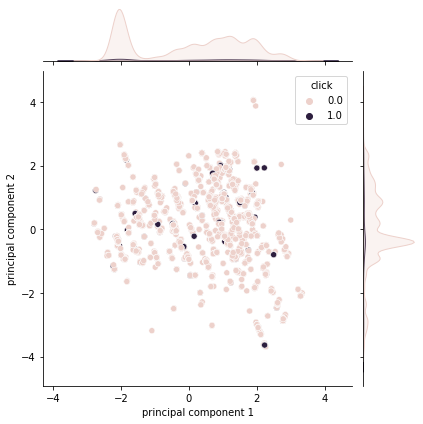

In [19]:
# PCA plot
sb.jointplot(data=finalDf,x='principal component 1',y='principal component 2',hue='click')